In [187]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X, y), (Xtest, y_test) = mnist.load_data()
y_train=to_categorical(y)
y_test=to_categorical(y_test)

# 1.Softmax Regression

In [33]:
net = models.Sequential()
net.add(layers.Dense(10, activation='softmax', input_shape=(28*28,))) # 입력(input_dim) 1개, 출력(units) 1개인 레이어를 생성
net.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [188]:
X_train = X.reshape((60000, 28*28))
X_train = X_train/255

X_test = Xtest.reshape((10000, 28*28))
X_test = X_test/255

In [35]:
net.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7877 - accuracy: 0.8121
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4574 - accuracy: 0.8810
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4039 - accuracy: 0.8913
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3771 - accuracy: 0.8966
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3603 - accuracy: 0.9008
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3484 - accuracy: 0.9037
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3394 - accuracy: 0.9054
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3322 - accuracy: 0.9078
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3262 - accuracy: 0.9092
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.321

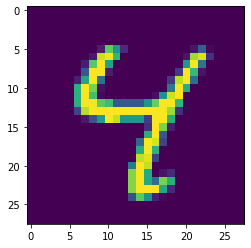

In [36]:
plt.imshow(Xtest[6])

In [37]:
np.argmax(net.predict(X_test)[6])

4

In [38]:
y_test[6]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
net.evaluate(X_test,y_test)

313/313 [==============================] - 0s 965us/step - loss: 0.2877 - accuracy: 0.9199


[0.28767141699790955, 0.9199000000953674]

# 2. Support Vector Machine

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [150]:
svc = SVC(kernel='linear')

In [156]:
y_train.shape

(60000, 10)

In [157]:
y_train2.ndim

2

In [153]:
X_train2 = X_train.reshape((-1,1))

In [154]:
y_train2= y_train.reshape((-1,1))

In [155]:
svc.fit(X_train,y_train)

ValueError: bad input shape (60000, 10)

#  3.RandomForest

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [199]:
clf.score(X_train,y_train)

1.0

In [200]:
ypred=clf.predict(X_test)

In [201]:
accuracy_score(ypred,y_test)

0.9067